In [1]:
from util import readSinogram
import matplotlib.pyplot as plt
from skimage.transform import iradon
import scipy as sp
import numpy as np

sinogramData = readSinogram("data/sinogram-patient.txt")
angles = np.loadtxt("data/angles.txt")
sinogram = sinogramData[2].T
nbprj = sinogramData[0]
nb_angles = sinogramData[1]

In [ ]:
output_size = 96
sinogram = sinogram.T
teta = np.sort(angles)
radius = output_size // 2
image = np.zeros((96, 96))
rs = np.linspace(-radius, radius, output_size)
xg, yg = np.meshgrid(rs, rs)
P = np.fft.fft(sinogram, axis=0)
nu = np.fft.fftfreq(nbprj) * nbprj
uc = []
vc = []
fft_vals = []
for i, angle in enumerate(teta):
    u = nu * np.cos(angle)
    v = nu * np.sin(angle)
    uc.extend(u)
    vc.extend(v)
    fft_vals.extend(P[:,i])
grid_points = np.array([uc, vc]).T
grid_fft = np.array(fft_vals)
grid_real = sp.interpolate.griddata(grid_points, np.real(grid_fft), (xg, yg), method="linear", fill_value=0)
grid_imag = sp.interpolate.griddata(grid_points, np.imag(grid_fft), (xg, yg), method="linear", fill_value=0)
grid_data = grid_real + 1j*grid_imag

image = np.fft.ifft2(np.fft.ifftshift(grid_data))
image = np.fft.fftshift(np.real(image))

(336, 720)


IndexError: index 336 is out of bounds for axis 0 with size 336

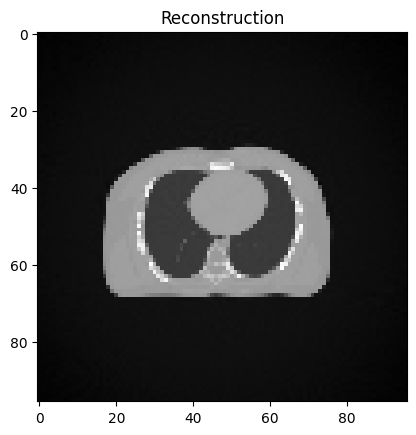

In [ ]:
plt.imshow(image, cmap="gray")
plt.title("Reconstruction")
plt.show()